In [1]:
# Import dependencies

from pymongo import MongoClient
from config import mongo_esi_url
from pprint import pprint
import pandas as pd 

In [2]:
# Call ddatabase collection from Mongo DB
mongo_uri = mongo_esi_url
client = MongoClient(mongo_esi_url)
db = client['opendata']
schools = db['school']

In [3]:
# Show contents of the database
school_results = schools.find()

# Iterate and print documents
for document in school_results:
    pprint(document)

{'_id': ObjectId('65d970f749f1372a69f1360d'),
 'geometry': {'coordinates': [[-79.267103936897, 43.7320819460129]],
              'type': 'MultiPoint'},
 'properties': {'ADDRESS_FULL': '2425 Eglinton Ave E',
                'ADDRESS_NUMBER': '2425',
                'ADDRESS_POINT_ID': 330677,
                'BOARD_NAME': '',
                'CENTRELINE_ID': 111254,
                'CITY': 'Toronto',
                'GENERAL_USE_CODE': 104008,
                'GEO_ID': 330677,
                'HI_NUM': 0,
                'HI_NUM_SUF': '',
                'LINEAR_NAME_FULL': 'Eglinton Ave E',
                'LINEAR_NAME_ID': 125,
                'LO_NUM': 2425,
                'LO_NUM_SUF': '',
                'MUNICIPALITY': 'Scarborough',
                'NAME': 'A PLUS ACADEMY OF ADVANCEMENT',
                'OBJECTID': 1,
                'PLACE_NAME': '',
                'POSTAL_CODE': 'M1K 5G8',
                'SCHOOL_LEVEL': '',
                'SCHOOL_TYPE': 'PR',
             

{'_id': ObjectId('65d970f749f1372a69f13672'),
 'geometry': {'coordinates': [[-79.5047717197305, 43.7330245969924]],
              'type': 'MultiPoint'},
 'properties': {'ADDRESS_FULL': '26 Troutbrooke Dr',
                'ADDRESS_NUMBER': '26',
                'ADDRESS_POINT_ID': 570175,
                'BOARD_NAME': 'Toronto District School Board',
                'CENTRELINE_ID': 443483,
                'CITY': 'Toronto',
                'GENERAL_USE_CODE': 102001,
                'GEO_ID': 570175,
                'HI_NUM': 0,
                'HI_NUM_SUF': '',
                'LINEAR_NAME_FULL': 'Troutbrooke Dr',
                'LINEAR_NAME_ID': 6946,
                'LO_NUM': 26,
                'LO_NUM_SUF': '',
                'MUNICIPALITY': 'North York',
                'NAME': 'BEVERLEY HEIGHTS MIDDLE SCHOOL',
                'OBJECTID': 102,
                'PLACE_NAME': 'Beverly Heights Middle School',
                'POSTAL_CODE': 'M3M 1S5',
                'SCHOOL_LEVEL'

 'properties': {'ADDRESS_FULL': '299A Donlands Ave',
                'ADDRESS_NUMBER': '299A',
                'ADDRESS_POINT_ID': 6208930,
                'BOARD_NAME': 'Toronto Catholic District School Board',
                'CENTRELINE_ID': 14646499,
                'CITY': 'Toronto',
                'GENERAL_USE_CODE': 102003,
                'GEO_ID': 6208930,
                'HI_NUM': 0,
                'HI_NUM_SUF': '',
                'LINEAR_NAME_FULL': 'Donlands Ave',
                'LINEAR_NAME_ID': 109,
                'LO_NUM': 299,
                'LO_NUM_SUF': 'A',
                'MUNICIPALITY': 'East York',
                'NAME': 'HOLY CROSS CATHOLIC ELEMENTARY SCHOOL',
                'OBJECTID': 468,
                'PLACE_NAME': 'Holy Cross Catholic Secondary School - Building '
                              'Grounds',
                'POSTAL_CODE': 'M4J 3R7',
                'SCHOOL_LEVEL': '',
                'SCHOOL_TYPE': 'ES',
                'SCHOOL_TYPE_DE

{'_id': ObjectId('65d970f749f1372a69f138f6'),
 'geometry': {'coordinates': [[-79.4152049534391, 43.6681449064113]],
              'type': 'MultiPoint'},
 'properties': {'ADDRESS_FULL': '734 Palmerston Ave',
                'ADDRESS_NUMBER': '734',
                'ADDRESS_POINT_ID': 6619760,
                'BOARD_NAME': 'Toronto District School Board',
                'CENTRELINE_ID': 6619772,
                'CITY': 'Toronto',
                'GENERAL_USE_CODE': 102001,
                'GEO_ID': 6619760,
                'HI_NUM': 0,
                'HI_NUM_SUF': '',
                'LINEAR_NAME_FULL': 'Palmerston Ave',
                'LINEAR_NAME_ID': 4142,
                'LO_NUM': 734,
                'LO_NUM_SUF': '',
                'MUNICIPALITY': 'former Toronto',
                'NAME': 'PALMERSTON AVENUE JUNIOR PUBLIC SCHOOL',
                'OBJECTID': 746,
                'PLACE_NAME': 'Palmerston Avenue Public School',
                'POSTAL_CODE': 'M6G 2R4',
          

                'NAME': 'STEPHEN LEACOCK COLLEGIATE INSTITUTE',
                'OBJECTID': 1020,
                'PLACE_NAME': 'Stephen Leacock Collegiate Institute - Building '
                              'Grounds',
                'POSTAL_CODE': 'M1T 2M5',
                'SCHOOL_LEVEL': '',
                'SCHOOL_TYPE': 'EP',
                'SCHOOL_TYPE_DESC': 'English Public',
                'SOURCE_ADDRESS': '2450 BIRCHMOUNT RD',
                '_id': 1020},
 'type': 'Feature'}
{'_id': ObjectId('65d970f849f1372a69f13a09'),
 'geometry': {'coordinates': [[-79.4932050987089, 43.7510558213298]],
              'type': 'MultiPoint'},
 'properties': {'ADDRESS_FULL': '50 Stilecroft Dr',
                'ADDRESS_NUMBER': '50',
                'ADDRESS_POINT_ID': 7522835,
                'BOARD_NAME': 'Toronto District School Board',
                'CENTRELINE_ID': 30092975,
                'CITY': 'Toronto',
                'GENERAL_USE_CODE': 102001,
                'GEO_ID': 7522

In [4]:
# Select relevant fields into lists
# Create empty lists
school_id = []
name = []
city = []
school_type = []
school_type_desc = []
board_name = []
municipality = []

#Iterate to find relevant data
school_results = schools.find()
result = [x for x in school_results]
for item in result:
    school_id.append(item['properties']['OBJECTID'])
    name.append(item['properties']['NAME'])
    city.append(item['properties']['CITY'])
    school_type.append(item['properties']['SCHOOL_TYPE'])
    school_type_desc.append(item['properties']['SCHOOL_TYPE_DESC'])
    board_name.append(item['properties']['BOARD_NAME'])
    municipality.append(item['properties']['MUNICIPALITY'])

# Put data into a dataframe
school_df = pd.DataFrame({
    "ID": school_id,
    "Name": name,
    "City": city,
    "School Type": school_type,
    "School Type Desc": school_type_desc,
    "Board": board_name,
    "Municipality":municipality 
})

# Formatting
school_df.set_index("ID", inplace=True)
school_df['Name'] = school_df['Name'].str.title()

# Show values
school_df.head(10)

,Name,City,School Type,School Type Desc,Board,Municipality
ID,,,,,,
1,A Plus Academy Of Advancement,Toronto,PR,Private,,Scarborough
2,A R S Armenian Private School,Toronto,PR,Private,,North York
3,A Y J Global Academy,Toronto,PR,Private,,North York
4,A Y Jackson Secondary School,Toronto,EP,English Public,Toronto District School Board,North York
5,Abacus Montessori Learning Centre,Toronto,PR,Private,,North York
6,Abu Bakr Education Academy,Toronto,PR,Private,,Scarborough
7,Acacia International High School,Toronto,PR,Private,,Etobicoke
8,Academie Alexandre Dumas,Toronto,FP,French Public,Conseil scolaire Viamonde,Scarborough
9,Academy Of Excellence,Toronto,PR,Private,,North York


In [5]:
# Check description of dataframe to find number of unique values in fields

school_df.describe()

,Name,City,School Type,School Type Desc,Board,Municipality
count,1194,1194,1194,1194,1194,1194
unique,1193,1,7,7,5,6
top,Urban International High School,Toronto,EP,English Public,Toronto District School Board,North York
freq,2,1194,601,601,601,352


In [6]:
# Group data by municipality & school type

grouped_school_df = school_df.groupby(['Municipality','School Type Desc'])[["Name"]].count()
grouped_school_df

Name
Municipality   School Type Desc      
East York                           1
               English Public      26
               English Separate     3
               French Public        1
               Private              4
Etobicoke                           4
               English Public      77
               English Separate    36
               French Public        2
               French Separate      3
               Private             26
               University           1
North York                          4
               English Public     144
               English Separate    60
               French Public        4
               French Separate      2
               Private            136
               University           2
Scarborough                         4
               English Public     171
               English Separate    59
               French Public        2
               French Separate      3
               Private             66
               University           1
York           English Public      35
               English Separate    14
               Private              8
former Toronto                      4
               English Public     148
               English Separate    47
               French Public        5
               French Separate      4
               Private             78
               University           9

In [7]:
print(grouped_school_df.columns)

Index(['Name'], dtype='object')


In [16]:
# Using data that is grouped by will not work for plotting graphs
# Create a new dataframe with the values
# Initialize an empty dictionary to store the counts
counts = {}

# Iterate through each row of the DataFrame
for index, row in school_df.iterrows():
    
    # Extract municipality and school type description
    municipality = row['Municipality']
    school_type_desc = row['School Type Desc']
    
    # If the municipality is not in the dictionary, add it with an empty dictionary
    if municipality not in counts:
        counts[municipality] = {}
    
    # If the school type description is not in the municipality's dictionary, add it with count 1
    if school_type_desc not in counts[municipality]:
        counts[municipality][school_type_desc] = 1
        
    # If the school type description is already in the municipality's dictionary, increment its count
    else:
        counts[municipality][school_type_desc] += 1

# Convert the counts dictionary into a DataFrame
counts_df = pd.DataFrame(counts).fillna(0)

# Transpose the DataFrame to have municipalities as index and school type descriptions as columns
counts_df = counts_df.transpose()

counts_df

,Private,French Public,English Public,English Separate,,French Separate,University
Scarborough,66.0,2.0,171.0,59.0,4.0,3.0,1.0
North York,136.0,4.0,144.0,60.0,4.0,2.0,2.0
Etobicoke,26.0,2.0,77.0,36.0,4.0,3.0,1.0
former Toronto,78.0,5.0,148.0,47.0,4.0,4.0,9.0
East York,4.0,1.0,26.0,3.0,1.0,0.0,0.0
York,8.0,0.0,35.0,14.0,0.0,0.0,0.0


In [9]:
counts_df_sorted = counts_df.sort_values(by='English Public', ascending=False)
counts_df_sorted = counts_df_sorted[['English Public', 'English Separate', 'Private', 'French Public', 'French Separate', 'University']]
counts_df_sorted

,English Public,English Separate,Private,French Public,French Separate,University
Scarborough,171.0,59.0,66.0,2.0,3.0,1.0
former Toronto,148.0,47.0,78.0,5.0,4.0,9.0
North York,144.0,60.0,136.0,4.0,2.0,2.0
Etobicoke,77.0,36.0,26.0,2.0,3.0,1.0
York,35.0,14.0,8.0,0.0,0.0,0.0
East York,26.0,3.0,4.0,1.0,0.0,0.0


In [10]:
# Save to csv

school_df.to_csv('Resources/all_school_data', index=False)
counts_df_sorted.to_csv('Resources/school_count_data', index=False)

In [11]:
import matplotlib.pyplot as plt

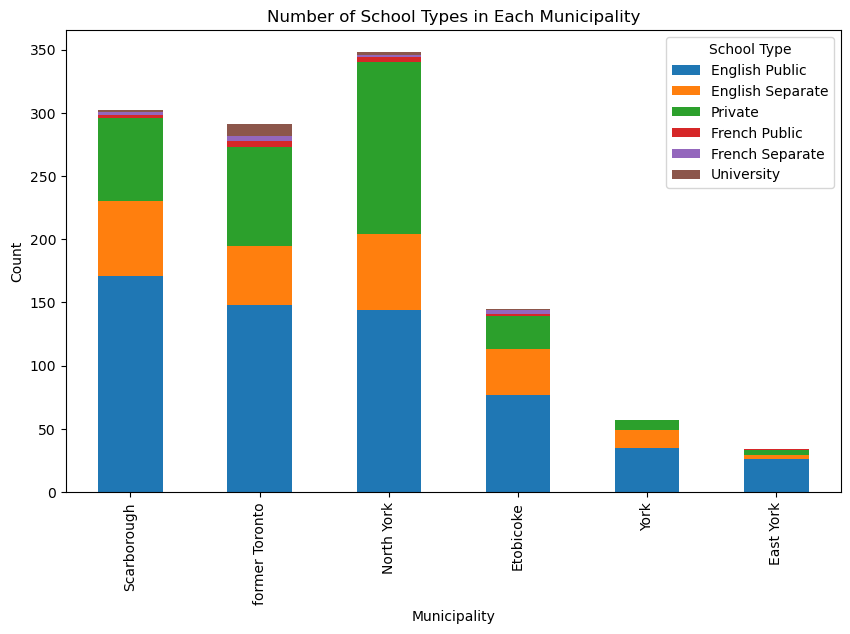

In [12]:
# Plot the grouped bar chart
counts_df_sorted.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Municipality')
plt.ylabel('Count')
plt.title('Number of School Types in Each Municipality')
plt.legend(title='School Type')

plt.savefig('Output/school_graph_stacked.png')

# Show the plot
plt.show()

In [18]:
counts_df_sorted = counts_df_sorted.reset_index().rename(columns={'index': 'Municipality'})
counts_df_sorted

,Municipality,English Public,English Separate,Private,French Public,French Separate,University
0,Scarborough,171.0,59.0,66.0,2.0,3.0,1.0
1,former Toronto,148.0,47.0,78.0,5.0,4.0,9.0
2,North York,144.0,60.0,136.0,4.0,2.0,2.0
3,Etobicoke,77.0,36.0,26.0,2.0,3.0,1.0
4,York,35.0,14.0,8.0,0.0,0.0,0.0
5,East York,26.0,3.0,4.0,1.0,0.0,0.0


In [19]:
counts_df_sorted.to_csv('Resources/final_school_data', index=False)